# TASK 1- (Gayatri Bhatambarekar)

# Predict the percentage of an student based on the no. of study hours.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# DATA COLLECTION

In [3]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# DATA VISUALISATION

<AxesSubplot:xlabel='Hours', ylabel='count'>

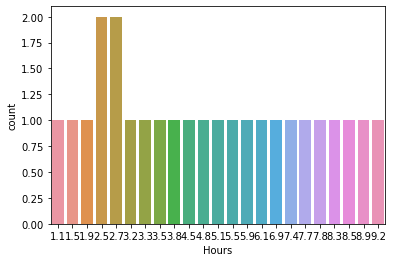

In [5]:
sns.countplot(x="Hours",data=df)

array([[<AxesSubplot:title={'center':'Hours'}>,
        <AxesSubplot:title={'center':'Scores'}>]], dtype=object)

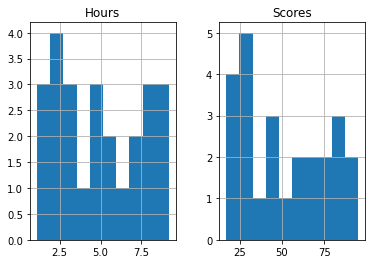

In [6]:
df.hist()

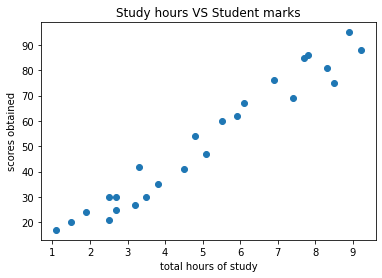

In [3]:
plt.scatter(x=df.Hours,y=df.Scores)
plt.xlabel("total hours of study")
plt.ylabel("scores obtained")
plt.title("Study hours VS Student marks")
plt.show()

#linear relation

<AxesSubplot:>

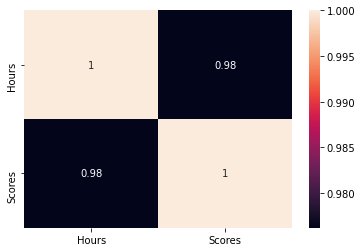

In [9]:
sns.heatmap(df.corr(),annot=True)

# TRAINING AND TESTING OF DATA

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
lr=LinearRegression()
lr.fit(x,y)
lr.fit(x_train,y_train)
print("training complete")



training complete


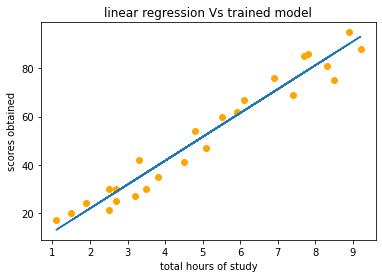

In [6]:
line=lr.coef_*x+lr.intercept_
plt.title("linear regression Vs trained model")
plt.scatter(x,y,color="orange")
plt.xlabel("total hours of study")
plt.ylabel("scores obtained")
plt.plot(x,line)
plt.show()

In [22]:
y_pred=lr.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [14]:
df1=pd.DataFrame({'Actual':y_test,"Predicted":y_pred})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<AxesSubplot:>

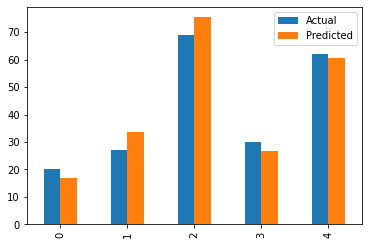

In [15]:
df1.plot(kind="bar")

In [24]:
Hours=6
test=np.array([Hours])
test=test.reshape(-1,1)
y_pred1=lr.predict([[6]])
print("No of hours: {}".format(Hours))
print("predicted score: ",y_pred1[0])

No of hours: 6
predicted score:  61.4820989252881


In [25]:
from  sklearn import metrics
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))


Mean Squared Error: 21.5987693072174
Mean Absolute Error: 4.183859899002975
